# Load a PRMS statistical output variable file into a datetime indexed pandas dataframe using `util.load_statvar`
---

Loading time series data into Pandas is useful because Pandas has been built for to handle and manipulate tabular or time series data. From Pandas the data can also be easily converted to other formats such as csv. Pandas objects can conveniently be index by dates and tabular operations such as pivot tables, sort, groupby are readily available. The statistical output variable file from PRMS AKA statvar file holds time series output. Examples of data within this file include simulated temperature at one location in the model or basin area weighted evaporation and many others, listed in tables in the PRMS manual.

In [1]:
import os
from prms_python.util import load_statvar 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
% matplotlib inline

### Call the function using an example statvar file which returns a Pandas dataframe

In [2]:
inf = os.path.join('..', 'test', 'data', 'statvar.dat') 
df = load_statvar(inf)
## view first five lines of dataframe
df.head() # the resulting function returns a datetime indexed dataframe

statistical_variables,basin_cfs_1,basin_potet_1,orad_1,runoff_57
date,,,,
1984-07-01,864.475023,0.087736,201.736343,19800.0
1984-07-02,3665.486368,0.068127,201.237671,21900.0
1984-07-03,4885.737093,0.104705,322.316528,23100.0
1984-07-04,7464.010971,0.158801,302.056671,24600.0
1984-07-05,13864.822171,0.179917,281.067871,26500.0


### Date indexing and slicing is now easily done in Pandas
* Example below show date slicing using strings that pandas interprets, e.g. "10/01/1984"
* Then plot the time series of the statvar variables: simulated streamflow (basin_cfs) and measured streamflow (runoff) 

In [3]:
## get measured and simulated streamflow on a specific date using pandas.DataFrame.loc
df.loc["10/01/1984",['basin_cfs_1','runoff_57']]

statistical_variables,basin_cfs_1,runoff_57
date,,
1984-10-01,7637.170504,11100.0


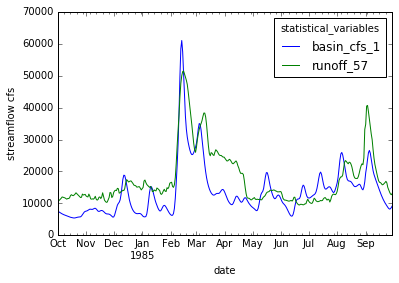

In [4]:
## get a slice of the dataframe for the two streamflow variables and slice for a water year and plot
plot_data = df.loc["10/01/1984":"09/30/1985",['basin_cfs_1','runoff_57']] 
plot_data.plot()  ## could also use matplotlib or other plot package
plt.ylabel('streamflow cfs')

In [5]:
## use pandas function to get summary statistics for the 1985 water year
plot_data.describe()

statistical_variables,basin_cfs_1,runoff_57
count,365.000000,365.000000
mean,13538.175130,17724.657534
std,8235.247999,8772.001833
min,5400.609965,9480.000000
25%,8013.978742,11800.000000
50%,11762.005019,14100.000000
75%,15590.541780,21800.000000
max,61061.663343,51500.000000


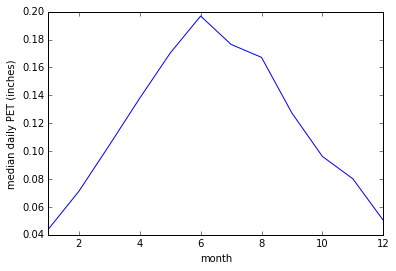

In [6]:
# pivot table combined with datetime index allows for easy time aggregation
# for example the monthly median of daily PET over the period of record can be computed using pivot_table
monthly_median_PET = df.pivot_table(values='basin_potet_1', index=df.index.month, aggfunc=np.median)
plt.plot(monthly_median_PET)
plt.xlim(1,12)
plt.ylabel('median daily PET (inches)')
plt.xlabel('month')